In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-status-prediction/loan_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [3]:
loan_data = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')

In [4]:
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [5]:
loan_data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
371,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
372,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
373,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
374,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
375,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
missing_values = loan_data.iloc[:, :10].isnull().sum()

missing_values

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
dtype: int64

Data Cleaning

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

loan_data = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')

# Initialize LabelEncoder
le = LabelEncoder()

# Encoding categorical variables
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    loan_data[col] = le.fit_transform(loan_data[col].astype(str))

# Handling 'Dependents' separately due to mixed types
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', 3).astype(float)

# Convert the DataFrame to a Numpy array
loan_data_np = loan_data.drop(columns=['Loan_ID']).to_numpy(dtype=float)

# Display the shape of the Numpy array to confirm conversion
loan_data_np.shape


(381, 12)

In [9]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,1,1,3.0,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,LP002974,1,1,0.0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,LP002978,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,LP002979,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [10]:
# Drop rows with any NaN values
loan_data_dropped_rows = loan_data.dropna(axis=0) 

print(loan_data_dropped_rows)

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001003       1        1         1.0          0              0   
1    LP001005       1        1         0.0          0              1   
2    LP001006       1        1         0.0          1              0   
3    LP001008       1        0         0.0          0              0   
4    LP001013       1        1         0.0          1              0   
..        ...     ...      ...         ...        ...            ...   
376  LP002953       1        1         3.0          0              0   
377  LP002974       1        1         0.0          0              0   
378  LP002978       0        0         0.0          0              0   
379  LP002979       1        1         3.0          0              0   
380  LP002990       0        0         0.0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

In [12]:
# Remove duplicate rows based on all columns
df_unique = loan_data_dropped_rows.drop_duplicates()

print(df_unique)

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001003       1        1         1.0          0              0   
1    LP001005       1        1         0.0          0              1   
2    LP001006       1        1         0.0          1              0   
3    LP001008       1        0         0.0          0              0   
4    LP001013       1        1         0.0          1              0   
..        ...     ...      ...         ...        ...            ...   
376  LP002953       1        1         3.0          0              0   
377  LP002974       1        1         0.0          0              0   
378  LP002978       0        0         0.0          0              0   
379  LP002979       1        1         3.0          0              0   
380  LP002990       0        0         0.0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

In [14]:
df_unique.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
5,LP001024,1,1,2.0,0,0,3200,700.0,70.0,360.0,1.0,2,1
6,LP001027,1,1,2.0,0,2,2500,1840.0,109.0,360.0,1.0,2,1
7,LP001029,1,0,0.0,0,0,1853,2840.0,114.0,360.0,1.0,0,0
8,LP001030,1,1,2.0,0,0,1299,1086.0,17.0,120.0,1.0,2,1
9,LP001032,1,0,0.0,0,0,4950,0.0,125.0,360.0,1.0,2,1


In [15]:
# Recheck 

missing_values = df_unique.iloc[:, :10].isnull().sum()

missing_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [16]:
# Save the cleaned DataFrame to a new CSV file
df_unique.to_csv('loan_data_new.csv', index=False)

In [17]:
df_unique

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,1,1,3.0,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,LP002974,1,1,0.0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,LP002978,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,LP002979,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [18]:
df_unique.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.804805,0.594595,0.687688,0.255255,0.204204,3593.363363,1272.489249,104.972973,341.513514,0.852853,1.027027,0.708709
std,0.433229,0.491709,0.996257,0.436661,0.532425,1451.588738,2440.800417,29.038755,66.990495,0.354786,0.773734,0.455041
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2583.000000,0.000000,90.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3340.000000,983.000000,110.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4288.000000,1983.000000,128.000000,360.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,3.000000,1.000000,2.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000


Convert to numpy

In [19]:
df_unique_array = df_unique.to_numpy()

In [20]:
df_unique

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,1,1,3.0,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,LP002974,1,1,0.0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,LP002978,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,LP002979,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [25]:
print(df_unique.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Convert from pandas to numpy in 2 times

In [31]:
# First step is to import the necessary libraries to handle the file and perform the initial data processing.
import pandas as pd
import numpy as np

# Data Read Files Csv using pandas
df_unique = pd.read_csv('loan_data_new.csv')

# Convert data pandas to numpy
data_numpy = df_unique.to_numpy()

# Initial inspection of the data to understand its structure, types of data, and potential issues
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            333 non-null    object 
 1   Gender             333 non-null    int64  
 2   Married            333 non-null    int64  
 3   Dependents         333 non-null    float64
 4   Education          333 non-null    int64  
 5   Self_Employed      333 non-null    int64  
 6   ApplicantIncome    333 non-null    int64  
 7   CoapplicantIncome  333 non-null    float64
 8   LoanAmount         333 non-null    float64
 9   Loan_Amount_Term   333 non-null    float64
 10  Credit_History     333 non-null    float64
 11  Property_Area      333 non-null    int64  
 12  Loan_Status        333 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 33.9+ KB


In [32]:
df_unique.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


Machine Learning - Visualize with histogram 

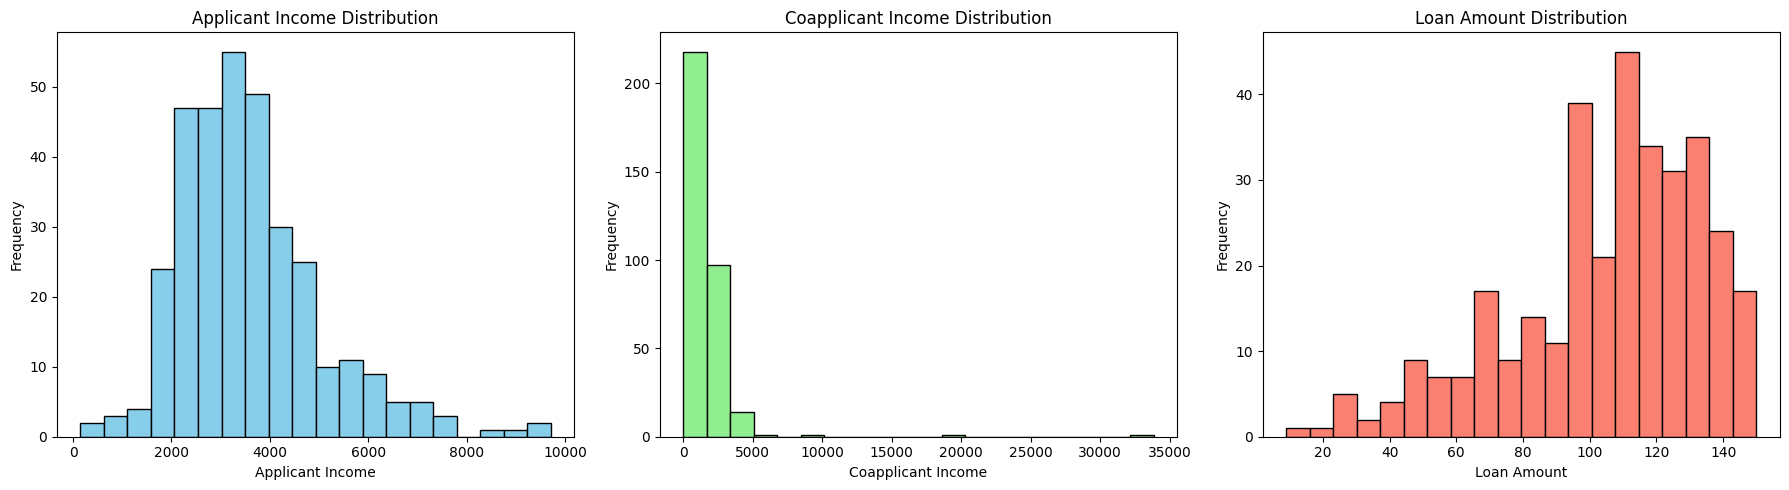

In [37]:
import matplotlib.pyplot as plt

# Data visualization using histograms for key numeric variables
plt.figure(figsize=(18, 5))

# ApplicantIncome distribution
plt.subplot(1, 3, 1)
plt.hist(df_unique['ApplicantIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

# CoapplicantIncome distribution
plt.subplot(1, 3, 2)
plt.hist(df_unique['CoapplicantIncome'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

# LoanAmount distribution
plt.subplot(1, 3, 3)
plt.hist(df_unique['LoanAmount'], bins=20, color='salmon', edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Applicant Income Distribution: The distribution of applicant income is right-skewed, indicating that most applicants have lower incomes, with fewer applicants having higher incomes.

Coapplicant Income Distribution: Similar to applicant income, the coapplicant income distribution is also right-skewed. Many coapplicants have low income, and a smaller number have higher incomes.

Loan Amount Distribution: The loan amount distribution appears somewhat normally distributed but with a right skew. Most loan amounts are in the middle of the range, with fewer loans being very small or very large.

Encoding Categorical Variables

In [41]:
print(df_unique.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status', 'Education_0',
       'Education_1', 'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')


In [42]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df_unique' is your DataFrame and you've selected 'Education' and 'Credit_History' as categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df_unique[['Education_0', 'Credit_History_0.0']])

# To add these back into the DataFrame you can use:
encoded_df_unique = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Education_0', 'Credit_History_0.0']))
df_unique = df_unique.drop(['Education_0', 'Credit_History_0.0'], axis=1)
df_unique = pd.concat([df_unique, encoded_df_unique], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
encoded_df_unique

,Education_0_0.0,Education_0_1.0,Credit_History_0.0_0.0,Credit_History_0.0_1.0
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
328,0.0,1.0,1.0,0.0
329,0.0,1.0,1.0,0.0
330,0.0,1.0,1.0,0.0
331,0.0,1.0,1.0,0.0


Feature Scaling

In [44]:
print(df_unique.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status', 'Education_1',
       'Credit_History_1.0', 'Education_0_0.0', 'Education_0_1.0',
       'Credit_History_0.0_0.0', 'Credit_History_0.0_1.0'],
      dtype='object')


In [45]:
from sklearn.preprocessing import StandardScaler

# Assuming 'ApplicantIncome' and 'LoanAmount' are the features you want to scale
scaler = StandardScaler()
df_unique[['ApplicantIncome', 'LoanAmount']] = scaler.fit_transform(df_unique[['ApplicantIncome', 'LoanAmount']])

Splitting the Data into Training and Testing Sets

In [46]:
from sklearn.model_selection import train_test_split

# Assuming 'Loan_Status' is the target variable
X = df_unique.drop('Loan_Status', axis=1)  # Features
y = df_unique['Loan_Status']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

This process involves fitting the model to the data, allowing it to learn the relationship between features and the target variable.

In [48]:
# convert a pandas series to numeric

pd.to_numeric(df_unique['Loan_Status'], errors='coerce')


0      0
1      1
2      1
3      1
4      1
      ..
328    1
329    1
330    1
331    1
332    0
Name: Loan_Status, Length: 333, dtype: int64

In [51]:
pd.to_numeric(df_unique['Credit_History_0.0_1.0'], errors='coerce')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
328    0.0
329    0.0
330    0.0
331    0.0
332    1.0
Name: Credit_History_0.0_1.0, Length: 333, dtype: float64

In [52]:
pd.to_numeric(df_unique['Credit_History_0.0_0.0'], errors='coerce')

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
328    1.0
329    1.0
330    1.0
331    1.0
332    0.0
Name: Credit_History_0.0_0.0, Length: 333, dtype: float64

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming df_unique is your DataFrame and you've already identified the features and target variable

# Selecting multiple features (example: 'Credit_History', 'ApplicantIncome', 'LoanAmount')
# Assuming these columns exist in df_unique and you want to use them as features
feature_columns = ['Credit_History_0.0_1.0', 'ApplicantIncome', 'LoanAmount']  # Add or remove columns as needed
X = df_unique[feature_columns]
y = df_unique['Loan_Status']  # Make sure 'Loan_Status' is your target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
logistic_model = LogisticRegression()

# Fit the model to the training data
# This might require reshaping if y_train is a pandas Series; however, it's usually not necessary.
# The common issue could be with X if it's a single column, but since we're using multiple features, it should be fine.
logistic_model.fit(X_train, y_train)


LogisticRegression()

Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7611940298507462


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.35      0.50        23
           1       0.74      0.98      0.84        44

    accuracy                           0.76        67
   macro avg       0.82      0.66      0.67        67
weighted avg       0.79      0.76      0.73        67



Hyperparameter Tuning with Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Score: 0.8570929419986022


Cross-Validation with Logistic Regression

In [63]:
from sklearn.model_selection import cross_val_score

logistic_model = LogisticRegression()
# Assuming X and y are already defined
scores = cross_val_score(logistic_model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.82089552 0.80597015 0.80597015 0.89393939 0.86363636]
Average score: 0.838082315694256
